# Avaliação de Redes Complexas

Nome: Vítor Amorim Fróis
NUSP: 12543440

<hr>

Inicialmente são feitos imports e funções que serão utilizadas ao longo do notebook.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import EoN
import random as random
import statistics as stat
import scipy

In [4]:
def process_graph(G):
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G)
    return G

In [5]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [6]:
def get_all_degrees(G):
  degrees = []
  for node in G.nodes:
    degrees.append(G.degree[node])
  return degrees

In [7]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues = np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [8]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N**m
    return M

**1 -** (a) Crie o gráfo a seguir usando a biblioteca networkx e mostre o gráfo.<br>
Link para visualizar o grafo: https://commons.wikimedia.org/wiki/File:6n-graf.png<br>

In [7]:
G = nx.Graph()
edge_list = [(1, 2), (2, 3), (3, 4), (1, 5), (4, 5), (4, 6)]
G.add_edges_from(edge_list)

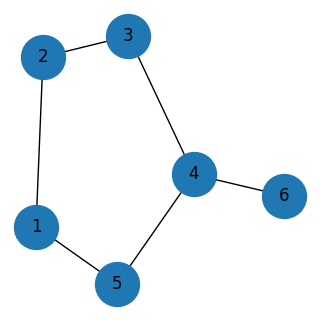

In [8]:
plt.figure(1,figsize=(3,3)) 
nx.draw(G, with_labels=True, node_size=1000)

(b) Simule uma caminha aleatória nesse grafo e monte uma matriz onde o elemento Mij representa o número de visitas ao vértice j dado que a caminhada iniciou em i. Considere pelo menos 100 passos. Compare o número de visitas com a medida eigenvector centrality de cada vértice.

In [9]:
nodes_list = list(G.nodes())
n_nodes = (len(nodes_list))
M = []
T = 100
for seed_node in nodes_list:
    ng = G.neighbors(seed_node)
    walk_p = np.zeros(n_nodes)
    for t in range(0,T):
        next_node = random.choice(list(ng))
        ng = G.neighbors(next_node)
        walk_p[next_node - 1] += 1
    M.append(walk_p)
M = np.array(M)
print(f'Matriz M: \n{M}')
M_sum = np.sum(M, axis=0)
print(f'A soma das colunas representa o total de vezes que o vértice foi visitado durante as iterações: \n{M_sum}')

Matriz M: 
[[22. 17. 12. 21. 19.  9.]
 [11. 15. 21. 30. 17.  6.]
 [20. 16. 13. 24. 18.  9.]
 [18. 15. 15. 24. 18. 10.]
 [13. 16. 20. 27. 16.  8.]
 [29. 22.  9. 16. 18.  6.]]
A soma das colunas representa o total de vezes que o vértice foi visitado durante as iterações: 
[113. 101.  90. 142. 106.  48.]


In [10]:
eig = list(nx.eigenvector_centrality(G).values())
eig

[0.3851210254201053,
 0.3851210254201053,
 0.4293744388249957,
 0.5229658034947686,
 0.4293744388249957,
 0.24727624734544199]

In [11]:
stat.correlation(M_sum, eig)

0.9178416854206368

Ao checar a correlação entre os dois métodos, obtemos um valor alto. Isso se deve ao fato de que os valores foram obtidos para uma mesma medida através de caminhos diferentes (método iterativo e da potência).

<hr>

**2 -** (a) Leia a rede do arquivo advogato.txt e mostre a distribuição acumulada complementar do grau, isto é, $P(K > k)$.

In [9]:
G = nx.convert_node_labels_to_integers(nx.read_edgelist('data-prova/advogato.txt'))

In [31]:
k, Pk = degree_distribution(G)
inv_cumsum = 1 - np.cumsum(Pk)

[0, 805] [0.0, 0.9432282546238216]


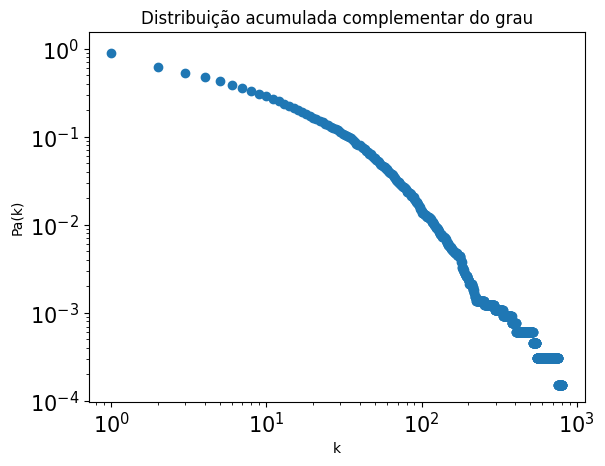

In [95]:

# determine best fit line

plt.loglog(k, inv_cumsum, 'o')

print(xl, yl)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('k')
plt.ylabel('Pa(k)')
plt.title('Distribuição acumulada complementar do grau')
plt.show()

Pelo gráfico, é possível perceber uma distribuição baseada na lei de potência, indicando que a rede possui baixa homofilia. Podemos confirmar isso com o coeficiente de assortatividade.

In [98]:
nx.degree_assortativity_coefficient(G)

-0.07694795994236779

(b) Mostre o gráfico de Knn(k), ou seja, o grau médio dos vizinhos dos vértices de grau k em função do grau k.

In [119]:
knn = np.array(list(nx.average_neighbor_degree(G, nodes=G.nodes()).values()))

vk = dict(G.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = np.mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
        
fig = plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

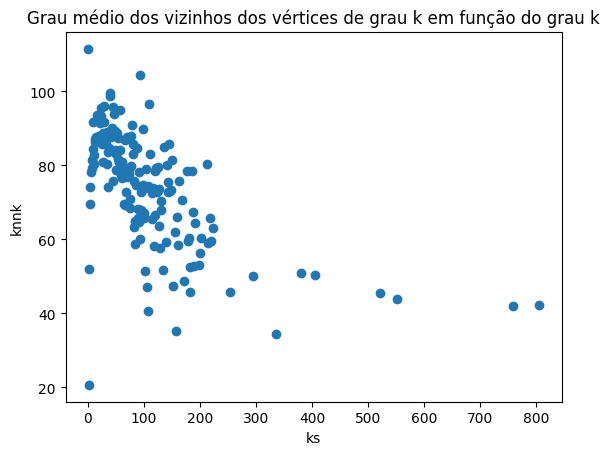

In [165]:
plt.xlabel('ks')
plt.ylabel('knnk')
plt.title('Grau médio dos vizinhos dos vértices de grau k em função do grau k')
plt.plot(ks, knnk, 'o')

(c) Calcule a matriz de menores distâncias $D$ a matriz $A^n$, que presenta o número de caminhadas de comprimento $n$ entre cada par de vértices. Faça um gráfico da correlação entre $D_{ij}$ e $A_{ij}$ para diferentes valores de $n$. Ou seja, um gráfico em que o eixo x representa n e o y, a correlação entre essas duas matrizes.

In [10]:
G = process_graph(G)
array = nx.to_numpy_array(G)
csr = scipy.sparse.csr_matrix(array)
D = (scipy.sparse.csgraph.shortest_path(csr))
D_elements = D.flatten()

In [11]:
A = array

In [15]:
x = []
y = []

A = array

for n in range(6):
    x.append(n)
    A_elements = A.flatten()
    y.append(stat.correlation(A_elements, D_elements))
    A_power = np.linalg.matrix_power(A, 2)
    A = A_power

<Figure size 1000x600 with 0 Axes>

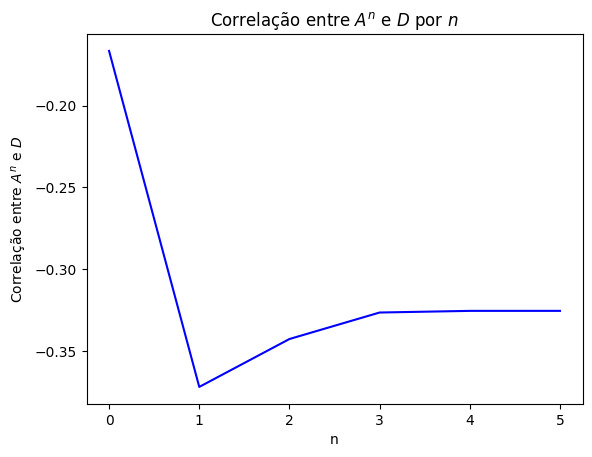

<Figure size 1000x600 with 0 Axes>

In [16]:
plt.xlabel('n')
plt.ylabel('Correlação entre $A^n$ e $D$')
plt.title('Correlação entre $A^n$ e $D$ por $n$')
plt.plot(x, y, 'b')
plt.figure(figsize=(10,6))

<hr>

**3 -** Considere a rede do arquivo internet_routers-22july06.gml. Escreva um código que calcule as seguintes medidas: (a) grau médio, (b) transitividade, (c) segundo momento da distribuição do grau, (d) entropia de Shannon da distribuição do grau, (e) coeficiente de assortatividade. Considere apenas o maior componente. Armazene os valores em uma lista e imprima essa lista, indicando os valores de cada medida. 

In [116]:
routers = nx.read_gml('data-prova/internet_routers-22july06.gml')

In [122]:
average_degree = momment(G, 1)
transitivity = nx.transitivity(G)
G_momment = momment(G, 2)
G_shannon = shannon_entropy(G)
G_assortativity = nx.degree_assortativity_coefficient(G)

In [123]:
print('Grau médio: ', average_degree)
print('Transitividade: ', transitivity)
print('Segundo momento do grau: ', G_momment)
print('Entropia de Shannon: ', G_shannon)
print('Coeficiente de assortatividade: ', G_assortativity)

Grau médio:  4.218612550624918
Transitividade:  0.011146383847822162
Segundo momento do grau:  0.048033802976160965
Entropia de Shannon:  2.3657964585920395
Coeficiente de assortatividade:  -0.1983848751205647


<hr>

**4 -** Simule o modelo de propagação de epidemias SIR na rede de aeroportos dos EUA (USairport_2010.txt). Calcule a correlação de Pearson entre a fração final de recuperados e as seguintes medidas de centralidade: (a) grau, (b) betweenness centrality, (c) eigenvector centrality, (d) closenness centrality. Mostre os resultados e indique a maior correlação. Considere $\beta = 0.6$ e $\mu = 0.1$ no modelo SIR.

In [9]:
G = nx.read_edgelist('data-prova/USairport_2010.txt')

In [10]:
beta = 0.05
mi = 0.1
seed_list = list(G.nodes())
n = len(seed_list)
R_rate_list = []
degree_list = []
bet_list = []
eigen_list = []
close_list = []  

In [11]:
all_deg_list = nx.degree(G)
all_eig_list = nx.eigenvector_centrality(G)
all_bet_list = nx.betweenness_centrality(G)
all_close_list = nx.closeness_centrality(G)

In [12]:
for seed in seed_list:
    times, S, I, R = EoN.fast_SIR(G, beta, mi, [seed])
    degree_list.append(all_deg_list[seed])
    bet_list.append(all_eig_list[seed])
    eigen_list.append(all_eig_list[seed])
    close_list.append(all_close_list[seed])
    R_rate_list.append(R[-1]/n)
    print(f'Last time info (seed = {seed}): {S[-1]}, {I[-1]}, {R[-1]}')

Last time info (seed = 1): 1573, 0, 1
Last time info (seed = 47): 415, 0, 1159
Last time info (seed = 832): 367, 0, 1207
Last time info (seed = 2): 431, 0, 1143
Last time info (seed = 679): 372, 0, 1202
Last time info (seed = 3): 1573, 0, 1
Last time info (seed = 424): 439, 0, 1135
Last time info (seed = 1688): 418, 0, 1156
Last time info (seed = 4): 1573, 0, 1
Last time info (seed = 685): 450, 0, 1124
Last time info (seed = 6): 1573, 0, 1
Last time info (seed = 7): 1573, 0, 1
Last time info (seed = 8): 1573, 0, 1
Last time info (seed = 1217): 391, 0, 1183
Last time info (seed = 1729): 395, 0, 1179
Last time info (seed = 9): 1573, 0, 1
Last time info (seed = 91): 395, 0, 1179
Last time info (seed = 11): 437, 0, 1137
Last time info (seed = 1494): 379, 0, 1195
Last time info (seed = 12): 395, 0, 1179
Last time info (seed = 227): 458, 0, 1116
Last time info (seed = 505): 417, 0, 1157
Last time info (seed = 509): 445, 0, 1129
Last time info (seed = 13): 1573, 0, 1
Last time info (seed = 15

Last time info (seed = 1596): 380, 0, 1194
Last time info (seed = 1613): 417, 0, 1157
Last time info (seed = 1630): 455, 0, 1119
Last time info (seed = 1822): 358, 0, 1216
Last time info (seed = 1831): 385, 0, 1189
Last time info (seed = 33): 414, 0, 1160
Last time info (seed = 118): 382, 0, 1192
Last time info (seed = 34): 478, 0, 1096
Last time info (seed = 35): 435, 0, 1139
Last time info (seed = 598): 428, 0, 1146
Last time info (seed = 1820): 429, 0, 1145
Last time info (seed = 36): 368, 0, 1206
Last time info (seed = 1428): 432, 0, 1142
Last time info (seed = 37): 415, 0, 1159
Last time info (seed = 38): 430, 0, 1144
Last time info (seed = 146): 1572, 0, 2
Last time info (seed = 348): 373, 0, 1201
Last time info (seed = 498): 402, 0, 1172
Last time info (seed = 545): 414, 0, 1160
Last time info (seed = 631): 388, 0, 1186
Last time info (seed = 651): 1573, 0, 1
Last time info (seed = 692): 428, 0, 1146
Last time info (seed = 700): 465, 0, 1109
Last time info (seed = 702): 440, 0, 

Last time info (seed = 836): 520, 0, 1054
Last time info (seed = 851): 404, 0, 1170
Last time info (seed = 862): 408, 0, 1166
Last time info (seed = 1030): 383, 0, 1191
Last time info (seed = 1146): 426, 0, 1148
Last time info (seed = 1190): 385, 0, 1189
Last time info (seed = 1266): 387, 0, 1187
Last time info (seed = 1290): 439, 0, 1135
Last time info (seed = 1387): 395, 0, 1179
Last time info (seed = 1544): 405, 0, 1169
Last time info (seed = 1601): 437, 0, 1137
Last time info (seed = 1677): 433, 0, 1141
Last time info (seed = 1733): 434, 0, 1140
Last time info (seed = 1743): 394, 0, 1180
Last time info (seed = 69): 386, 0, 1188
Last time info (seed = 674): 435, 0, 1139
Last time info (seed = 230): 1573, 0, 1
Last time info (seed = 264): 411, 0, 1163
Last time info (seed = 279): 1573, 0, 1
Last time info (seed = 308): 425, 0, 1149
Last time info (seed = 421): 415, 0, 1159
Last time info (seed = 587): 405, 0, 1169
Last time info (seed = 720): 423, 0, 1151
Last time info (seed = 726):

Last time info (seed = 496): 383, 0, 1191
Last time info (seed = 499): 428, 0, 1146
Last time info (seed = 502): 457, 0, 1117
Last time info (seed = 503): 1573, 0, 1
Last time info (seed = 510): 381, 0, 1193
Last time info (seed = 512): 421, 0, 1153
Last time info (seed = 513): 420, 0, 1154
Last time info (seed = 527): 468, 0, 1106
Last time info (seed = 538): 1573, 0, 1
Last time info (seed = 539): 1573, 0, 1
Last time info (seed = 548): 453, 0, 1121
Last time info (seed = 579): 360, 0, 1214
Last time info (seed = 591): 475, 0, 1099
Last time info (seed = 594): 411, 0, 1163
Last time info (seed = 615): 368, 0, 1206
Last time info (seed = 626): 430, 0, 1144
Last time info (seed = 648): 410, 0, 1164
Last time info (seed = 655): 1573, 0, 1
Last time info (seed = 665): 476, 0, 1098
Last time info (seed = 715): 435, 0, 1139
Last time info (seed = 750): 1573, 0, 1
Last time info (seed = 774): 409, 0, 1165
Last time info (seed = 901): 388, 0, 1186
Last time info (seed = 908): 371, 0, 1203
La

Last time info (seed = 681): 467, 0, 1107
Last time info (seed = 1302): 426, 0, 1148
Last time info (seed = 1464): 1573, 0, 1
Last time info (seed = 1699): 1573, 0, 1
Last time info (seed = 525): 380, 0, 1194
Last time info (seed = 574): 442, 0, 1132
Last time info (seed = 582): 436, 0, 1138
Last time info (seed = 592): 381, 0, 1193
Last time info (seed = 701): 450, 0, 1124
Last time info (seed = 957): 398, 0, 1176
Last time info (seed = 1032): 1573, 0, 1
Last time info (seed = 1180): 459, 0, 1115
Last time info (seed = 1449): 426, 0, 1148
Last time info (seed = 177): 1573, 0, 1
Last time info (seed = 337): 413, 0, 1161
Last time info (seed = 443): 1573, 0, 1
Last time info (seed = 1223): 387, 0, 1187
Last time info (seed = 1805): 1573, 0, 1
Last time info (seed = 182): 352, 0, 1222
Last time info (seed = 184): 457, 0, 1117
Last time info (seed = 427): 430, 0, 1144
Last time info (seed = 814): 376, 0, 1198
Last time info (seed = 1447): 452, 0, 1122
Last time info (seed = 188): 438, 0, 

Last time info (seed = 1499): 436, 0, 1138
Last time info (seed = 351): 1573, 0, 1
Last time info (seed = 352): 1573, 0, 1
Last time info (seed = 360): 1573, 0, 1
Last time info (seed = 450): 425, 0, 1149
Last time info (seed = 366): 382, 0, 1192
Last time info (seed = 1388): 474, 0, 1100
Last time info (seed = 367): 1573, 0, 1
Last time info (seed = 368): 1573, 0, 1
Last time info (seed = 370): 1573, 0, 1
Last time info (seed = 1365): 401, 0, 1173
Last time info (seed = 1738): 1573, 0, 1
Last time info (seed = 374): 423, 0, 1151
Last time info (seed = 416): 1573, 0, 1
Last time info (seed = 377): 1571, 0, 3
Last time info (seed = 1648): 1573, 0, 1
Last time info (seed = 378): 1573, 0, 1
Last time info (seed = 274): 1573, 0, 1
Last time info (seed = 382): 1573, 0, 1
Last time info (seed = 603): 1573, 0, 1
Last time info (seed = 1500): 426, 0, 1148
Last time info (seed = 384): 435, 0, 1139
Last time info (seed = 386): 1572, 0, 2
Last time info (seed = 572): 386, 0, 1188
Last time info (

Last time info (seed = 617): 400, 0, 1174
Last time info (seed = 1229): 414, 0, 1160
Last time info (seed = 673): 451, 0, 1123
Last time info (seed = 1232): 482, 0, 1092
Last time info (seed = 1443): 394, 0, 1180
Last time info (seed = 624): 1573, 0, 1
Last time info (seed = 342): 1573, 0, 1
Last time info (seed = 660): 1573, 0, 1
Last time info (seed = 672): 1573, 0, 1
Last time info (seed = 714): 434, 0, 1140
Last time info (seed = 756): 1573, 0, 1
Last time info (seed = 810): 348, 0, 1226
Last time info (seed = 842): 1573, 0, 1
Last time info (seed = 856): 1573, 0, 1
Last time info (seed = 965): 1571, 0, 3
Last time info (seed = 1036): 395, 0, 1179
Last time info (seed = 1099): 1573, 0, 1
Last time info (seed = 1107): 1573, 0, 1
Last time info (seed = 1177): 376, 0, 1198
Last time info (seed = 1275): 418, 0, 1156
Last time info (seed = 1317): 446, 0, 1128
Last time info (seed = 1378): 1573, 0, 1
Last time info (seed = 1379): 454, 0, 1120
Last time info (seed = 1427): 398, 0, 1176
La

Last time info (seed = 730): 388, 0, 1186
Last time info (seed = 809): 386, 0, 1188
Last time info (seed = 915): 1573, 0, 1
Last time info (seed = 945): 1573, 0, 1
Last time info (seed = 1035): 479, 0, 1095
Last time info (seed = 1210): 1573, 0, 1
Last time info (seed = 1222): 1573, 0, 1
Last time info (seed = 1340): 1573, 0, 1
Last time info (seed = 1841): 387, 0, 1187
Last time info (seed = 887): 441, 0, 1133
Last time info (seed = 895): 452, 0, 1122
Last time info (seed = 1533): 442, 0, 1132
Last time info (seed = 898): 425, 0, 1149
Last time info (seed = 289): 440, 0, 1134
Last time info (seed = 900): 1572, 0, 2
Last time info (seed = 920): 1573, 0, 1
Last time info (seed = 249): 1573, 0, 1
Last time info (seed = 1167): 1573, 0, 1
Last time info (seed = 1585): 485, 0, 1089
Last time info (seed = 1635): 1573, 0, 1
Last time info (seed = 1796): 472, 0, 1102
Last time info (seed = 1817): 1573, 0, 1
Last time info (seed = 1510): 1573, 0, 1
Last time info (seed = 933): 431, 0, 1143
Last

In [15]:
deg_corr = stat.correlation(R_rate_list, degree_list)
bet_corr = stat.correlation(R_rate_list, bet_list)
eigen_corr = stat.correlation(R_rate_list, eigen_list)
close_corr = stat.correlation(R_rate_list, close_list)

In [16]:
print('Comparação entre medidas da rede e fração de recuperados para seed nodes')
print('Grau médio: ', deg_corr)
print('Betweeness: ', bet_corr)
print('Eigenvector ctl.: ', eigen_corr)
print('Closeness: ', close_corr)

Comparação entre medidas da rede e fração de recuperados para seed nodes
Grau médio:  0.288515249096329
Betweeness:  0.28228241575511237
Eigenvector ctl.:  0.28228241575511237
Closeness:  0.37126573518904266


A maior correlação foi encontrada na medida de Closeness Centrality. Pela definição, essa medida indica a proximidade do nó em relação à outros, e portanto, a correlação se mostra bem condizente.

<hr>

**5 -** Gere redes do tipo BA, ER e WS (p=0.05) com grau médio igual a 10 e N = 500. Desenvolva um estudo para mostrar que essas apresentam topologias diferentes. (Seja criativ@).

Disclaimer: como já realizado no trabalho de classificação de redes, poderia ter gerado várias redes e realizado o PCA, porém tentei fazer algo diferente utilizando o que aprendemos ao longo da matéria.

Primeiro são definidas funções para analisar redes BA, ER e WS.

In [9]:
import itertools
import collections

def ff3(x):
    return x*(x-1)*(x-2)

def avg_tetr_cc(g):
    tetrahedra = itertools.islice(itertools.groupby(
        nx.enumerate_all_cliques(g), len), 3, 4)
    try:
        tetrahedra = next(tetrahedra)[1]
    except StopIteration:
        return 0
    cnts = collections.Counter(itertools.chain(*tetrahedra))
    return 6 * sum(cnt / ff3(g.degree[v]) for v, cnt in cnts.items()) / len(g)

In [10]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def plot_with_communities(G):
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    partition = community_louvain.best_partition(G)
    pos = community_layout(G, partition)
    
    d = dict(G.degree)
    
    nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), 
                           node_size=[1*v for v in d.values()])
    plt.show()
    return


In [11]:
def plot_attacks(G, attack_type):
  if attack_type != "targeted" and attack_type != "random":
    print("Possible attack types: 'targeted' and 'random'.")
    return

  C = G.copy()
  N = C.number_of_nodes()
  number_of_steps = 25
  M = N // number_of_steps
  random_attack_core_proportions = []
  num_nodes_removed = range(0, N, M)
  for nodes_removed in num_nodes_removed:
      # Measure the relative size of the network core
      core = next(nx.connected_components(C))
      core_proportion = len(core) / N
      random_attack_core_proportions.append(core_proportion)
      
      # If there are more than M nodes, select M nodes at random and remove them
      if C.number_of_nodes() > M:
        if attack_type == "random":
          nodes_to_remove = random.sample(list(C.nodes), M)
          C.remove_nodes_from(nodes_to_remove)
        elif attack_type == "targeted":
          nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
          nodes_to_remove = nodes_sorted_by_degree[:M]
          C.remove_nodes_from(nodes_to_remove)
  
  plt.title(attack_type)
  plt.xlabel('Number of nodes removed')
  plt.ylabel('Proportion of nodes in core')
  plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

In [12]:
from collections import Counter

class Graph():
  def __init__(self, graph, name):
    self.G = graph
    self.name = name
    self.deg_list = [self.G.degree(n) for n in self.G.nodes()]
    self.nodes = nx.number_of_nodes(self.G)
    self.edges = nx.number_of_edges(self.G)
    self._density = nx.density(self.G)
    self._da_coeff = nx.degree_assortativity_coefficient(self.G)
    if(nx.is_connected(self.G)):
      self._spl_mean = nx.average_shortest_path_length(self.G)
    else:
      closeness_centr = nx.closeness_centrality(self.G)
      self._spl_mean = stat.mean(closeness_centr)
    nodes_clustering = nx.clustering(self.G)
    self._c_mean = stat.mean(nodes_clustering.values())
    self._c_stdev = stat.stdev(nodes_clustering.values())
    self._dg_mean = stat.mean(self.deg_list)
    self._dg_stdev = stat.stdev(self.deg_list)
    self.dg_median = stat.median(self.deg_list)
    betweenness = nx.betweenness_centrality(self.G)
    self.betweenness_sequence = list(betweenness.values())
    self._bt_mean = stat.mean(self.betweenness_sequence)
    self._bt_stdev = stat.stdev(self.betweenness_sequence)
    self._bt_median = stat.median(self.betweenness_sequence)

  def bgm(self):
    print(self.name) 
    print("Nodes:", self.nodes)
    print("Links:", self.edges)
    print("Density:", self._density)
    print("Degree mean: ", self._dg_mean)
    print("Degree standart deviation: ", self._dg_stdev)
    

  def swm(self):
    print("Small world measures: ") 
    print("Assortativity by degree:", self._da_coeff)
    print("Average shortest path lenght:", self._spl_mean)

  def plot(self):
    nx.draw(self.G, node_size=2)

  def deg_graph(self):
    k, Pk = degree_distribution(self.G)
    inv_cumsum = 1 - np.cumsum(Pk)
    fig, ax = plt.subplots()
    plt.loglog(k, inv_cumsum, 'o')

    plt.title(f"{self.name} model")
    plt.ylabel("Inverso da cumulativa de $P(k)$")
    plt.xlabel("$k$")
    plt.show()

    
  def centrality(self):
    #centrality distributions
    print("Centrality: ")
    print("Mean degree:", self._dg_mean)
    print("Median degree:", self.dg_median)
    print("Mean betweenness:", self._bt_mean)
    print("Median betweenness:", self._bt_median)
    #plots
    degree_counts = Counter(self.deg_list)
    plt.ylabel("N of nodes")
    plt.xlabel("Betweenness")
    plt.hist(self.betweenness_sequence)
    if(self.name == "Barabasi-Albert"):
        plt.yscale('log')
    plt.grid(True)
    plt.show()
    
  def robustness(self):
    #robustness
    plt.figure(1)
    plot_attacks(self.G, "random")
    plt.figure(2)
    plot_attacks(self.G, "targeted")
    plt.show()
  
  def core(self):
    #tried to simplify the graph with a core decomposition
    plt.figure(3)
    n = nx.number_of_nodes(self.G)
    net = self.G
    k = 1
    nodes_after_dec = n #nodes after decomposition
    while(nodes_after_dec != 0):
      oldNet = net
      net = nx.k_core(net, k)
      k += 1
      nodes_after_dec = nx.number_of_nodes(net)
    pos = nx.spring_layout(oldNet)
    nx.draw_networkx_nodes(oldNet, pos, node_size=20)
    nx.draw_networkx_edges(oldNet, pos, alpha=0.2)
    plt.plot()
    plt.show()
    
    
  def clustering(self):
    print('Clustering: ') 
    print("Clustering coefficient:", self._c_mean)
    print("Clustering standart deviation", self._c_stdev)
    self.avg_tetrahedron_cc = avg_tetr_cc(self.G)
    print("Tetrahedron Clustering: ", self.avg_tetrahedron_cc)

In [13]:
nodes = 500
k = 10
m = int(k/2)
p = k/(nodes-1)

er_graph = Graph(nx.erdos_renyi_graph(nodes, p), "Erdos-Renyi")
ws_graph = Graph(nx.watts_strogatz_graph(nodes, k, p), "Watts-Strogatz")
ba_graph = Graph(nx.barabasi_albert_graph(nodes, m), "Barabasi-Albert")

Nas medidas geradas, começamos com uma *decomposição k-core*, que permite visualizar o núcleo de maior grau do gráfico. 

Logo em seguida, plotamos um gráfico que mostra como é feita a *distribuição dos graus nos nós*. 

Então seguem medidas de *clustering*, includindo clustering de tetraedros, que buscam mostrar o quão agrupada a rede está. Essas estruturas são muito presentes em Álgebra Topológica.

Há um plot da rede com a *divisão de comunidades* realizadas através do algoritmo de Louvain - os tamanhos dos nós indicam o grau. Aqui buscamos apenas uma visualização da disposição da rede, e não de medidas.

Para buscar entender a topologia da rede, há um *teste de robustez*, com ataques direcionados e aleatórios.

Vamos então gerar os grafos.

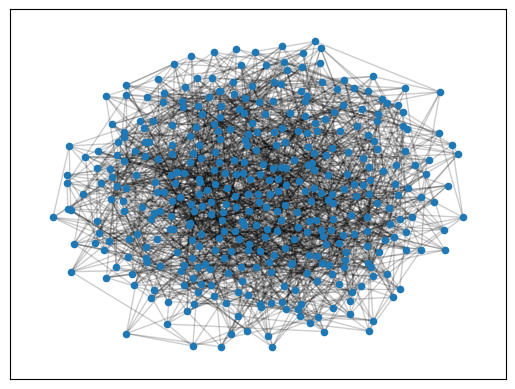

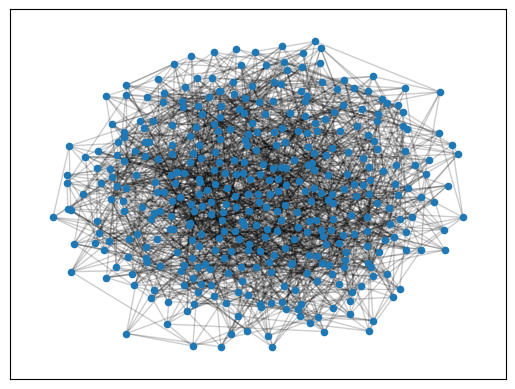

In [22]:
er_graph.core()
ws_graph.core()
ba_graph.core()

In [23]:
er_graph.deg_graph()
ws_graph.deg_graph()
ba_graph.deg_graph()

Após visualizar uma prévia da rede podemos ver a distribuição do grau. Nos dois primeiros grafos há uma distribuição semelhante a normal. No gráfico da rede BA notamos a presença de uma cauda, indicando a presença de Hubs.

In [24]:
er_graph.clustering()
ws_graph.clustering()
ba_graph.clustering()

Ao checar as medidas de clustering, vemos que são pequenas em ER e BA, mas grandes na rede Watts-Strogatz, devido a natureza da rede, mostrando que a rede é bem emaranhada.

In [25]:
plot_with_communities(er_graph.G)
plot_with_communities(ws_graph.G)
plot_with_communities(ba_graph.G)

O gráfico com a disposição das comunidas busca mostrar as divisões. Além disso, a rede BA apresenta Hubs de acordo com a imagem, como previsto no primeiro gráfico, sendo que esses Hubs ajudam a dividir a rede em comunidades.

In [26]:
er_graph.robustness()

In [27]:
ws_graph.robustness()

In [28]:
ba_graph.robustness()

Por fim, ao realizar os ataques, percebemos que as redes com mais Hubs são mais suscetíveis a ataques/falhas.

Podemos concluir que cada uma das 3 redes aleatórias possui uma característica de destaque.
As redes Watts-Strogatz apresentam alto grau de clusterização, já as redes Barabási-Albert apresentam Hubs bem definidos. Enquanto isso, o Erdos Renyi não possui características por conta de sua geração por um processo totalmente aleatório: é mediano em diversos parâmetros.